In [ ]:

import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Model
from tensorflow.keras import layers
from tensorflow.keras.applications.inception_v3 import InceptionV3
from keras.layers import Dense, Dropout, Activation, Flatten
tf.keras.applications.inception_v3.preprocess_input 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from glob import glob
import matplotlib.pyplot as plt
import os
import random
from os import getcwd


In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)


In [ ]:
train_generator = train_datagen.flow_from_directory(
    directory="/content/Train",
    target_size=(150, 150),
    color_mode="rgb",
    batch_size=50,
    class_mode="categorical",
    shuffle=True,
    seed=42
)

Found 3361 images belonging to 26 classes.


In [ ]:
valid_generator = valid_datagen.flow_from_directory(
    directory="/content/Test",
    target_size=(150, 150),
    color_mode="rgb",
    batch_size=50,
    class_mode="categorical",
    shuffle=True,
    seed=42
)
#path_inception = f"{getcwd()}/../content/drive/MyDrive/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5"

Found 807 images belonging to 26 classes.


In [ ]:

from tensorflow.keras.applications.inception_v3 import InceptionV3
# Create an instance of the inception model from the local pre-trained weights
#local_weights_file = path_inception
pre_trained_model = InceptionV3(input_shape = (150,150,3),
                               include_top  = False,
                               weights      = 'imagenet',
                                classifier_activation="softmax")
# top=false implies leaving the last fully connected layer of the pretrained model

In [ ]:




#pre_trained_model.load_weights(local_weights_file)

# Make all the layers in the pre-trained model non-trainable
for layer in pre_trained_model.layers:
      layer.trainable = False

# Print the model summary
pre_trained_model.summary()





Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_94 (Conv2D)             (None, 74, 74, 32)   864         ['input_2[0][0]']                
                                                                                                  
 batch_normalization_94 (BatchN  (None, 74, 74, 32)  96          ['conv2d_94[0][0]']              
 ormalization)                                                                                    
                                                                                       

In [ ]:
last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

last layer output shape:  (None, 7, 7, 768)


In [ ]:
from tensorflow.keras.optimizers import RMSprop

# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)
# Add a fully connected layer with 200 hidden units and ReLU activation
x = layers.Dense(200, activation = 'relu')(x)
# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)                  
# Add a final softmax layer for classification
x = layers.Dense  (26, activation = 'softmax')(x)           

model = Model( pre_trained_model.input, x) 

model.compile(optimizer = RMSprop(lr=0.0002), 
              loss = 'categorical_crossentropy', 
              metrics = ['acc'])

model.summary()


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_94 (Conv2D)             (None, 74, 74, 32)   864         ['input_2[0][0]']                
                                                                                                  
 batch_normalization_94 (BatchN  (None, 74, 74, 32)  96          ['conv2d_94[0][0]']              
 ormalization)                                                                                    
                                                                                            

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:


# output= model.fit(
#         train_generator,
#         steps_per_epoch=30,
#         epochs=10,
#         validation_data=valid_generator,
#         validation_steps=20)
batch_size=120
output= model.fit_generator(
        train_generator,
        steps_per_epoch=int(3361/batch_size),
        epochs=10,
        validation_data=valid_generator,
        validation_steps=int(807/batch_size))

# output= model.fit_generator(
#         train_generator,
#         steps_per_epoch=len(train_generator),
#         epochs=10,
#         validation_data=valid_generator,
#         validation_steps=len(valid_generator))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/10
30/30 [==============================] - 108s 4s/step - loss: 3.5549 - acc: 0.0620 - val_loss: 3.1965 - val_acc: 0.0855
Epoch 2/10
30/30 [==============================] - 68s 2s/step - loss: 3.1119 - acc: 0.1167
Epoch 3/10
30/30 [==============================] - 66s 2s/step - loss: 2.9300 - acc: 0.1663
Epoch 4/10
30/30 [==============================] - 66s 2s/step - loss: 2.6608 - acc: 0.2402
Epoch 5/10
30/30 [==============================] - 68s 2s/step - loss: 2.4410 - acc: 0.2913
Epoch 6/10
30/30 [==============================] - 68s 2s/step - loss: 2.2010 - acc: 0.3613
Epoch 7/10
30/30 [==============================] - 68s 2s/step - loss: 2.0213 - acc: 0.4147
Epoch 8/10
30/30 [==============================] - 68s 2s/step - loss: 1.8484 - acc: 0.4600
Epoch 9/10
30/30 [==============================] - 66s 2s/step - loss: 1.6508 - acc: 0.5400
Epoch 10/10
30/30 [==============================] - 67s 2s/step - loss: 1.5274 - acc: 0.5533


In [ ]:
score = model.evaluate(valid_generator)
print('Test Loss:', score[0])
print('Test accuracy:', score[1])




17/17 [==============================] - 39s 2s/step - loss: 2.1356 - acc: 0.4337
Test Loss: 2.135648488998413
Test accuracy: 0.43370509147644043


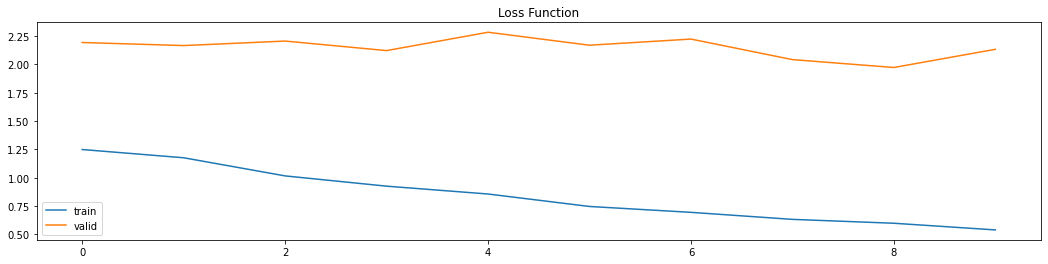

In [ ]:
plt.figure(figsize=(18, 4))
plt.plot(output.history['loss'], label = 'train')
plt.plot(output.history['val_loss'], label = 'valid')
plt.legend()
plt.title('Loss Function')
plt.show()

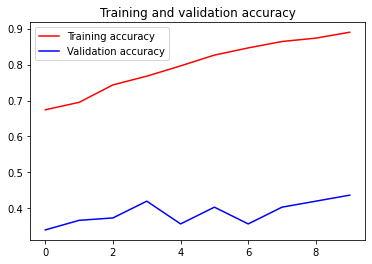

<Figure size 432x288 with 0 Axes>

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
acc = output.history['acc']
val_acc = output.history['val_acc']
loss = output.history['loss']
val_loss = output.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

In [ ]:
# # Define a Callback class that stops training once accuracy reaches 99.0%
# class myCallback(tf.keras.callbacks.Callback):
#       def on_epoch_end(self, epoch, logs={}):
#         if(logs.get('acc')>0.99):
#             print("\nReached 99.0% accuracy so cancelling training!")
#             self.model.stop_training = True

In [ ]:
#path_inception = f"{getcwd()}/../content/drive/MyDrive/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5"
from tensorflow.keras.applications.inception_v3 import InceptionV3
# Create an instance of the inception model from the local pre-trained weights
#local_weights_file = path_inception
pre_trained_model = InceptionV3(input_shape = (150,150,3),
                               include_top  = False,
                               weights      = 'imagenet',
                                classifier_activation="softmax")

In [ ]:

# top=false implies leaving the last fully connected layer of the pretrained model

#pre_trained_model.load_weights(local_weights_file)

# Make all the layers in the pre-trained model non-trainable
for layer in pre_trained_model.layers:
      layer.trainable = False

# Print the model summary
pre_trained_model.summary()





Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_188 (Conv2D)            (None, 74, 74, 32)   864         ['input_3[0][0]']                
                                                                                                  
 batch_normalization_188 (Batch  (None, 74, 74, 32)  96          ['conv2d_188[0][0]']             
 Normalization)                                                                                   
                                                                                       

In [ ]:

x = Flatten()(pre_trained_model.output)
x=Dense(100, activation='relu')(x)
Dropout(0.5)(x)
x=Dense(100, activation='relu')(x)
prediction = Dense(26, activation='softmax')(x)


In [ ]:
model = Model(inputs=pre_trained_model.input, outputs=prediction)
from tensorflow.keras.optimizers import RMSprop

In [ ]:
model.compile(optimizer = RMSprop(lr=0.0001), 
              loss = 'categorical_crossentropy', 
              metrics = ['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
output= model.fit(
        train_generator,
        steps_per_epoch=30,
        epochs=10,
        validation_data=valid_generator,
        validation_steps=len(valid_generator))


Epoch 1/10
30/30 [==============================] - 112s 4s/step - loss: 0.4909 - acc: 0.8960 - val_loss: 2.1770 - val_acc: 0.4027
Epoch 2/10
30/30 [==============================] - 111s 4s/step - loss: 0.4472 - acc: 0.9172 - val_loss: 2.1374 - val_acc: 0.4040
Epoch 3/10
30/30 [==============================] - 111s 4s/step - loss: 0.3920 - acc: 0.9295 - val_loss: 2.3290 - val_acc: 0.3680
Epoch 4/10
30/30 [==============================] - 113s 4s/step - loss: 0.3628 - acc: 0.9367 - val_loss: 2.1588 - val_acc: 0.4164
Epoch 5/10
30/30 [==============================] - 113s 4s/step - loss: 0.3384 - acc: 0.9367 - val_loss: 2.1727 - val_acc: 0.3891
Epoch 6/10
30/30 [==============================] - 112s 4s/step - loss: 0.2748 - acc: 0.9660 - val_loss: 2.2486 - val_acc: 0.3879
Epoch 7/10
30/30 [==============================] - 110s 4s/step - loss: 0.2875 - acc: 0.9521 - val_loss: 2.1026 - val_acc: 0.4498
Epoch 8/10
30/30 [==============================] - 110s 4s/step - loss: 0.2334 - a

In [ ]:
score = model.evaluate(valid_generator)
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

17/17 [==============================] - 39s 2s/step - loss: 2.3399 - acc: 0.3309
Test Loss: 2.3398776054382324
Test accuracy: 0.33085501194000244


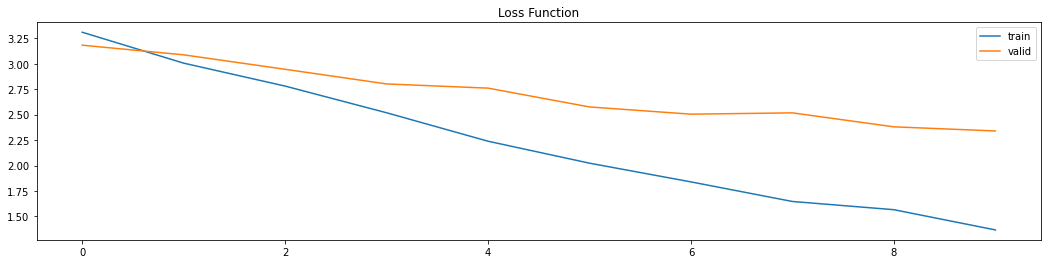

In [ ]:
plt.figure(figsize=(18, 4))
plt.plot(output.history['loss'], label = 'train')
plt.plot(output.history['val_loss'], label = 'valid')
plt.legend()
plt.title('Loss Function')
plt.show()

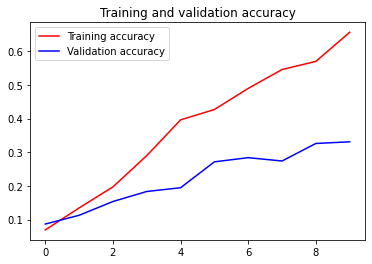

<Figure size 432x288 with 0 Axes>

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
acc = output.history['acc']
val_acc = output.history['val_acc']
loss = output.history['loss']
val_loss = output.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()